**Step 1:** Loading dependencies:

The first step is to load in the necessary dependencies, as i will be using these packages to load the training data, and train the models.

In [9]:
#loading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from imblearn.under_sampling import RandomUnderSampler

**Step 2:** Loading the dataset with `pandas`

First the data is loaded, checked for missing values, and irrelevant coloumns are dropped.

In [10]:
data = pd.read_csv('ai4i2020.csv')
df = pd.DataFrame(data)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [11]:
#Checking for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [12]:
#Drop irrelevant columns
df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


**Step 3:** Data Pre-Processing.

In this step, first the data is split into the test and training parts. I have chosen to do a 80-20 split between train and test data. Furthermore the data is scaled to normalise the features for a better result. Afterwards i use undersampling to get a more balanced training dataset. Finally i use gridsearch for hyperparameter tuning, where i have chosen some different parameters to loop through which are tested based on recall.

In [13]:
#Split the data
x=df.drop('Machine failure', axis=1)
y=df['Machine failure']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scale the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Undersampling data due to imbalance
undersampler = RandomUnderSampler(random_state=42)
x_train, y_train = undersampler.fit_resample(x_train, y_train)

In [14]:
#grid search
param_grid = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1, 0.5, 0.25, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4, cv=15, scoring='recall')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 15 folds for each of 25 candidates, totalling 375 fits
[CV 1/15] END .........C=1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/15] END .........C=1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 3/15] END .........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/15] END .........C=1, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 5/15] END .........C=1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 6/15] END .........C=1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 7/15] END .........C=1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 8/15] END .........C=1, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 9/15] END .........C=1, gamma=1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 10/15] END ........C=1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 11/15] END ........C=1, gamma=1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 12/15] END ........C=1, gamma=1, kernel=rb

**Step 4:** Model Training.

Here the model is trained on the previously made training dataset. Afterwards the model is used to predict machine failure in the test data.

In [17]:
SVM_model=SVC(C=1, gamma=0.1, kernel='rbf')
SVM_model.fit(x_train, y_train)
y_pred = SVM_model.predict(x_test)

**Step 5:** Model Evaluation

Finally the model is evaluated with a classification report, confusion matrix, ROC curve and a precision-recall chart.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1939
           1       0.17      0.92      0.29        61

    accuracy                           0.86      2000
   macro avg       0.58      0.89      0.61      2000
weighted avg       0.97      0.86      0.90      2000



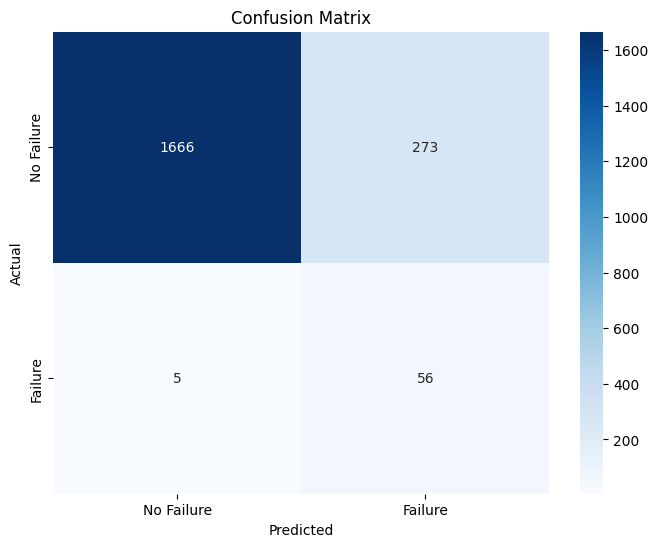

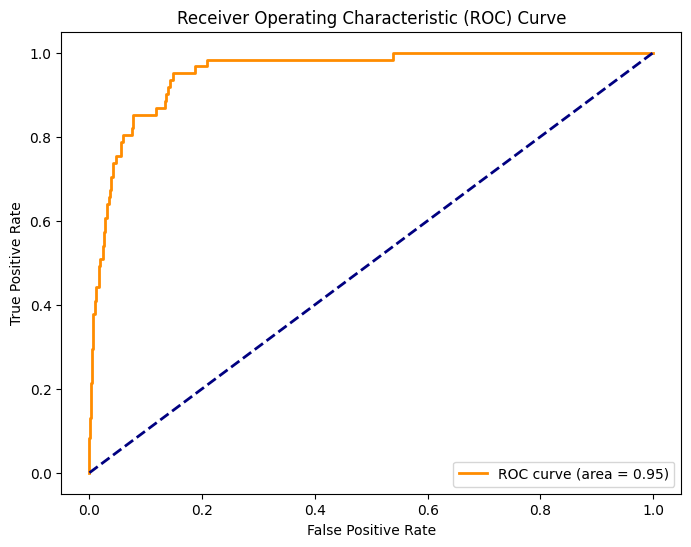

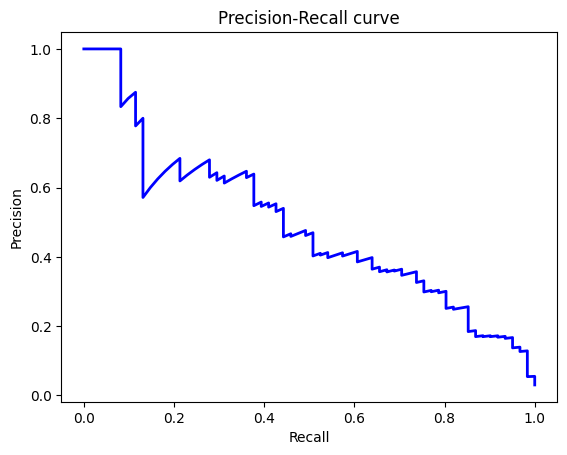

In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#roc curve
y_pred_prob = SVM_model.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()
 
